In [10]:
#a is the result dataframe from the simulation 
import pandas as pd 

from run import a
from smm_prep import get_moments

In [11]:
moments_norpy = pd.DataFrame(dict(get_moments(a)))

In [12]:
print(moments_norpy)

                             Wage Distribution        Choice Probability
1.0    [220583.18901547504, 86878.41222570468]  [0.1816, 0.7682, 0.0502]
2.0   [261793.25979713528, 102346.91820783891]  [0.3442, 0.6136, 0.0422]
3.0     [299665.6850008106, 112524.0889518826]   [0.4664, 0.505, 0.0286]
4.0     [328463.8544585566, 123316.4633282078]  [0.6346, 0.3408, 0.0246]
5.0   [373257.82730718295, 146734.98539998438]   [0.6712, 0.3118, 0.017]
6.0   [387779.70195092174, 154579.33352521673]   [0.6794, 0.301, 0.0196]
7.0   [403551.41267841635, 154907.28383889468]   [0.8274, 0.157, 0.0156]
8.0    [449292.0029961793, 195014.37573388478]  [0.8612, 0.1216, 0.0172]
9.0     [466840.1720331021, 197234.5377328065]   [0.8808, 0.1032, 0.016]
10.0   [480894.9873384872, 209012.70168905964]  [0.9046, 0.0796, 0.0158]
11.0   [496541.9040483903, 212483.40967167754]   [0.9176, 0.065, 0.0174]
12.0  [508731.74968757207, 218814.75350393174]   [0.9278, 0.054, 0.0182]
13.0  [513086.57310557587, 220685.58356365107]  [0.

In [13]:
#This is the respy version now 
import yaml

import respy as rp
import numpy as np
import pandas as pd

from ov_respy_config import TEST_RESOURCES_DIR
from validation_utils import get_moments

In [14]:
#Get the respy model spec 
options = yaml.safe_load((TEST_RESOURCES_DIR / f"norpy_estimates.yaml").read_text())
params = pd.read_csv(
        TEST_RESOURCES_DIR / f"norpy_estimates.csv", index_col=["category", "name"]
    )


In [15]:
#Get rid of weird string values
for x in params["value"]:
    x = float(x)

In [16]:
#Simulate the data with  the specified coefficeints
simulate = rp.get_simulate_func(params, options)
df = simulate(params)
moments_respy = pd.DataFrame(dict(get_moments(df)))




In [17]:
#Look at the respy moments 
print(moments_respy)

                           Wage Distribution        Choice Probability
0    [237802.34582542433, 82148.26433514021]     [0.205, 0.718, 0.077]
1   [279300.99653567484, 102858.87913610111]  [0.3844, 0.5568, 0.0588]
2    [307421.4734907328, 115600.84803271406]   [0.526, 0.4274, 0.0466]
3    [329356.4470182693, 120631.12857596474]      [0.72, 0.247, 0.033]
4     [370976.3556705346, 136394.4244389747]   [0.7784, 0.193, 0.0286]
5   [388934.24317406357, 147205.79485121695]   [0.8042, 0.173, 0.0228]
6   [404544.57902094966, 154790.74293335032]    [0.8188, 0.1612, 0.02]
7    [421435.72653462994, 162284.8473126826]  [0.8546, 0.1222, 0.0232]
8    [440055.9184736926, 178009.03188883598]  [0.8784, 0.0994, 0.0222]
9    [451226.57340549235, 187171.5786758011]   [0.889, 0.0842, 0.0268]
10  [469620.48562149465, 199105.51699580677]   [0.9088, 0.0662, 0.025]
11    [477695.7199234928, 204973.1317354014]   [0.921, 0.0534, 0.0256]
12  [490814.02041895274, 213674.81506260668]   [0.9308, 0.043, 0.0262]
13  [4

In [23]:
from matplotlib import pyplot 
import matplotlib.patches as mpatches



In [26]:
#Import the actual moments
import json

with open('/home/moritz/OpenSourceEconomics/ov_respy/ressources/moments.respy.json') as json_file:
    data = json.load(json_file)


In [29]:
moments_real = pd.DataFrame(data)
print(moments_real)

                                   Choice Probability Final Schooling  \
0                       [0.1902, 0.0, 0.7154, 0.0944]             [0]   
1                        [0.339, 0.0, 0.5912, 0.0698]             [0]   
2                       [0.4544, 0.0, 0.4948, 0.0508]             [0]   
3                       [0.7086, 0.0, 0.2526, 0.0388]             [0]   
4   [0.7651060424169668, 0.0, 0.21348539415766307,...             [0]   
5   [0.7814503205128205, 0.0, 0.20272435897435898,...             [0]   
6   [0.799036338084722, 0.0, 0.18189118650873318, ...             [0]   
7   [0.8357848075760629, 0.0, 0.14426758009268587,...             [0]   
8   [0.8721470410018178, 0.0, 0.11028075136336093,...             [0]   
9   [0.9059275743475622, 0.0, 0.07687639085575561,...         [0.104]   
10  [0.9321037697608431, 0.0, 0.051276854479124445...        [0.1088]   
11  [0.9354183590576767, 0.0, 0.04366368805848903,...        [0.1238]   
12  [0.938402114250864, 0.0, 0.04106525716609067, .

In [35]:
respy_wages = [x[0] for x in  moments_respy["Wage Distribution"][:38]]
norpy_wages = [x[0] for x in  moments_norpy["Wage Distribution"][:38]]
real_wages = [x[0] for x in  moments_real["Wage Distribution"]]

[0, 49, 0, 700000]

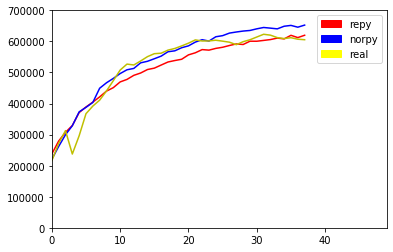

In [37]:
pyplot.plot(np.arange(38), respy_wages, 'r')
pyplot.plot(np.arange(38), norpy_wages, 'b')
pyplot.plot(np.arange(38), real_wages, 'y')

red_patch = mpatches.Patch(color='red', label='respy')
blue_patch = mpatches.Patch(color='blue', label='norpy')
yellow_patch = mpatches.Patch(color='yellow', label='real')

pyplot.legend(handles=[red_patch,blue_patch,yellow_patch])
pyplot.axis([0, 49, 0, 700000])


In [38]:
respy_work = [x[0] for x in  moments_respy["Choice Probability"][:38]]
norpy_work = [x[0] for x in  moments_norpy["Choice Probability"][:38]]
real_work = [x[0] for x in  moments_real["Choice Probability"]]

[0, 49, 0, 1]

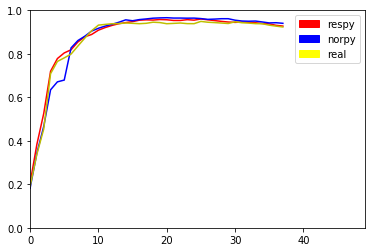

In [39]:
pyplot.plot(np.arange(38), respy_work, 'r')
pyplot.plot(np.arange(38), norpy_work, 'b')
pyplot.plot(np.arange(38), real_work, 'y')

red_patch = mpatches.Patch(color='red', label='respy')
blue_patch = mpatches.Patch(color='blue', label='norpy')
yellow_patch = mpatches.Patch(color='yellow', label='real')

pyplot.legend(handles=[red_patch,blue_patch,yellow_patch])
pyplot.axis([0, 49, 0, 1])

In [42]:
respy_educ = [x[1] for x in  moments_respy["Choice Probability"][:38]]
norpy_educ = [x[1] for x in  moments_norpy["Choice Probability"][:38]]
real_educ = [x[2] for x in  moments_real["Choice Probability"]]

[0, 49, 0, 1]

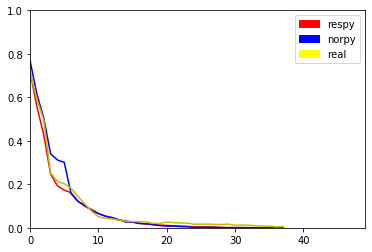

In [43]:
pyplot.plot(np.arange(38), respy_educ, 'r')
pyplot.plot(np.arange(38), norpy_educ, 'b')
pyplot.plot(np.arange(38), real_educ, 'y')

red_patch = mpatches.Patch(color='red', label='respy')
blue_patch = mpatches.Patch(color='blue', label='norpy')
yellow_patch = mpatches.Patch(color='yellow', label='real')

pyplot.legend(handles=[red_patch,blue_patch,yellow_patch])
pyplot.axis([0, 49, 0, 1])